In [1]:
import pathlib

from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4_3D

from parcels import logger, XarrayDecodedFilter
logger.addFilter(XarrayDecodedFilter())  # Add a filter for the xarray decoding warning

# Subset, lower left corner of my grid
enatl_data_path = pathlib.Path('day_1_5')

In [2]:
import itertools
import xorca.lib
mesh_mask_files = list(itertools.chain(enatl_data_path.glob('coord*.nc'), enatl_data_path.glob('m*.nc')))
datafiles = sorted(enatl_data_path.glob('eNATL60*.nc'))

dataset = xorca.lib.load_xorca_dataset(data_files=datafiles, aux_files=mesh_mask_files)

In [3]:
dataset

<xarray.Dataset>
Dimensions:   (z_c: 237, z_l: 237, y_c: 36, y_r: 36, x_c: 43, x_r: 43, t: 5)
Coordinates: (12/33)
  * z_c       (z_c) int64 1 2 3 4 5 6 7 8 9 ... 230 231 232 233 234 235 236 237
  * z_l       (z_l) float64 0.5 1.5 2.5 3.5 4.5 ... 233.5 234.5 235.5 236.5
  * y_c       (y_c) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * y_r       (y_r) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 32.5 33.5 34.5 35.5 36.5
  * x_c       (x_c) int64 1 2 3 4 5 6 7 8 9 10 ... 34 35 36 37 38 39 40 41 42 43
  * x_r       (x_r) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 39.5 40.5 41.5 42.5 43.5
    ...        ...
    e2f       (y_r, x_r) float64 dask.array<chunksize=(36, 43), meta=np.ndarray>
    e3w       (z_l, y_c, x_c) float64 dask.array<chunksize=(2, 36, 43), meta=np.ndarray>
    tmask     (z_c, y_c, x_c) int8 dask.array<chunksize=(2, 36, 43), meta=np.ndarray>
    umask     (z_c, y_c, x_r) int8 dask.array<chunksize=(2, 36, 43), meta=np.ndarray>
    vmask     (z_c, y_r, x_c) int8 dask.array<chunksize=(2, 36, 43), meta=np.ndarray>
    fmask     (z_c, y_r, x_r) int8 dask.array<chunksize=(2, 36, 43), meta=np.ndarray>
Data variables:
    sometauy  (t, y_r, x_c) float32 dask.array<chunksize=(1, 36, 43), meta=np.ndarray>
    somxl010  (t, y_c, x_c) float32 dask.array<chunksize=(1, 36, 43), meta=np.ndarray>
    sosaline  (t, y_c, x_c) float32 dask.array<chunksize=(1, 36, 43), meta=np.ndarray>
    sossheig  (t, y_c, x_c) float32 dask.array<chunksize=(1, 36, 43), meta=np.ndarray>
    sosstsst  (t, y_c, x_c) float32 dask.array<chunksize=(1, 36, 43), meta=np.ndarray>
    sowaflup  (t, y_c, x_c) float32 dask.array<chunksize=(1, 36, 43), meta=np.ndarray>
    sozotaux  (t, y_c, x_r) float32 dask.array<chunksize=(1, 36, 43), meta=np.ndarray>
    vomecrty  (t, z_c, y_r, x_c) float32 dask.array<chunksize=(1, 2, 36, 43), meta=np.ndarray>
    vosaline  (t, z_c, y_c, x_c) float32 dask.array<chunksize=(1, 2, 36, 43), meta=np.ndarray>
    votemper  (t, z_c, y_c, x_c) float32 dask.array<chunksize=(1, 2, 36, 43), meta=np.ndarray>
    vovecrtz  (t, z_l, y_c, x_c) float32 dask.array<chunksize=(1, 2, 36, 43), meta=np.ndarray>
    vozocrtx  (t, z_c, y_c, x_r) float32 dask.array<chunksize=(1, 2, 36, 43), meta=np.ndarray>

Given a dataset, with c-grid already arranged, is this correct? Or should I set the f-points here as in [[NEMO 3D tutorial|https://nbviewer.jupyter.org/github/OceanParcels/parcels/blob/master/parcels/examples/tutorial_nemo_3D.ipynb]]?

In [4]:
variables_from_dataset = {
    'U': 'vozocrtx',
    'V': 'vomecrty',
    'W': 'vovecrtz',
    'T': 'votemper',
    'S': 'vosaline',
}

dimensions_assuming_c_grid = {
    'U': {'lon': 'llon_cr', 'lat': 'llat_cr', 'depth': 'depth_c', 'time': 't'},
    'V': {'lon': 'llon_rc', 'lat': 'llat_rc', 'depth': 'depth_c', 'time': 't'},
    'W': {'lon': 'llon_cc', 'lat': 'llat_cc', 'depth': 'depth_l', 'time': 't'},
    'T': {'lon': 'llon_cc', 'lat': 'llat_cc', 'depth': 'depth_c', 'time': 't'},
    'S': {'lon': 'llon_cc', 'lat': 'llat_cc', 'depth': 'depth_c', 'time': 't'},
}

In [5]:
fieldset_from_dataset = FieldSet.from_xarray_dataset(dataset, variables_from_dataset, dimensions_assuming_c_grid, mesh='spherical')

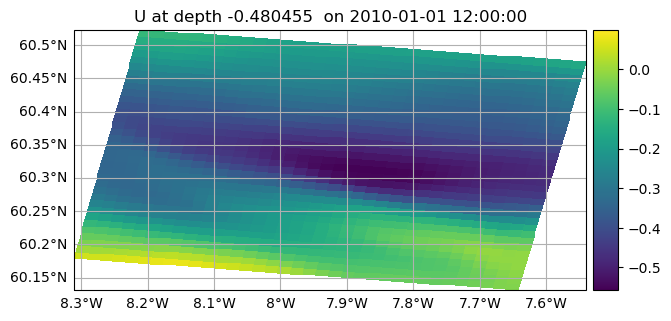

In [6]:
fieldset_from_dataset.U.show()